In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.manifold import Isomap
from hw4.libs.dataset import Dataset

In [2]:
from matplotlib import offsetbox
def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)
            

In [4]:
from sklearn.datasets import fetch_lfw_people
# faces = fetch_lfw_people(min_faces_per_person=30)
faces = fetch_lfw_people(min_faces_per_person=2)
faces.data.shape

(9164, 2914)

In [7]:
type(faces)

sklearn.utils.Bunch

In [5]:
from hw4.libs.dataset import Dataset
dataset = Dataset()
fives = dataset.get_5s()
d = dataset.get_dataset()

img_size = 28
shapes = (img_size, img_size)
fives.data.shape

(784, 72)

AttributeError: 'numpy.ndarray' object has no attribute 'images'

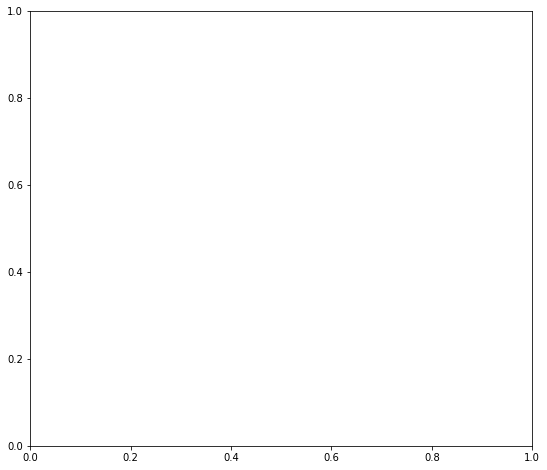

In [6]:
fig, ax = plt.subplots(figsize=(9, 8))
plot_components(fives.data,
                model=Isomap(n_components=2),
                images=fives.images[:, ::2, ::2])

In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
print(mnist.data.shape)
print(len(mnist.data[1250]))
data = mnist.data

(70000, 784)
784


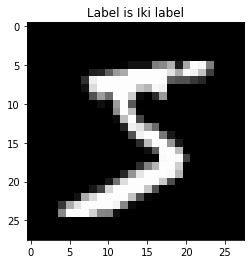

In [5]:
# Source: https://stackoverflow.com/questions/37228371/visualize-mnist-dataset-using-opencv-or-matplotlib-pyplot
# The first column is the label
label = "Iki label"
# print(' ** label = ', label)

# The rest of columns are pixels
pixels = data[0]
# print(' ** pixels = ', pixels)

# Make those columns into a array of 8-bits pixels
# This array will be of 1D with length 784
# The pixel intensity values are integers from 0 to 255
pixels = np.array(pixels, dtype='uint8')
# print(' ** pixels = ', pixels)

# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((28, 28))
# print(' ** pixels = ', pixels)

# Plot
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixels, cmap='gray')
plt.show()

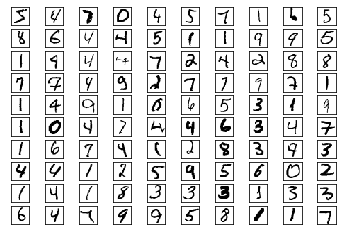

In [6]:
# Source: https://github.com/ntmeyer12/MATH273C/blob/master/manifoldlearning.ipynb
fig, numplt = plt.subplots(10, 10, subplot_kw=dict(xticks=[], yticks=[]))
for i, axis in enumerate(numplt.flat):
    axis.imshow(data[700*i].reshape(28, 28), cmap='gray_r')
    # axis.show()
    # axis.imshow(numbers.data[700*i].reshape(28, 28), cmap='gray_r')
    

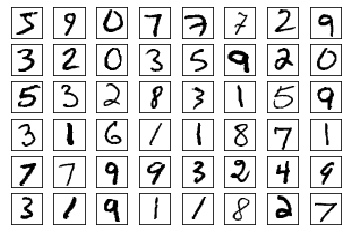

In [7]:
fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(mnist.data[1250 * i].reshape(28, 28), cmap='gray_r')

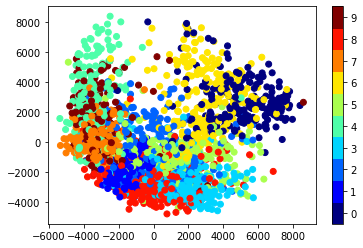

In [10]:
#### use only 1/30 of the data: full dataset takes a long time!
#### Source: https://stackoverflow.com/questions/53749579/valueerror-rgba-values-should-be-within-0-1-range-after-upgrading-matplotlib
data = mnist.data[::30].astype(int)
target = mnist.target[::30].astype(int)

model = Isomap(n_components=2)
proj = model.fit_transform(data)
plt.scatter(proj[:, 0], proj[:, 1], c=target, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=Isomap(n_components=2),
                images=faces.images[:, ::2, ::2])